In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
upload=files.upload()

Saving crime_data.csv to crime_data.csv


In [ ]:
# Import Dataset
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:

crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [ ]:
crime.shape

(50, 4)

In [ ]:
crime.describe



<bound method NDFrame.describe of     Murder  Assault  UrbanPop  Rape
0     13.2      236        58  21.2
1     10.0      263        48  44.5
2      8.1      294        80  31.0
3      8.8      190        50  19.5
4      9.0      276        91  40.6
5      7.9      204        78  38.7
6      3.3      110        77  11.1
7      5.9      238        72  15.8
8     15.4      335        80  31.9
9     17.4      211        60  25.8
10     5.3       46        83  20.2
11     2.6      120        54  14.2
12    10.4      249        83  24.0
13     7.2      113        65  21.0
14     2.2       56        57  11.3
15     6.0      115        66  18.0
16     9.7      109        52  16.3
17    15.4      249        66  22.2
18     2.1       83        51   7.8
19    11.3      300        67  27.8
20     4.4      149        85  16.3
21    12.1      255        74  35.1
22     2.7       72        66  14.9
23    16.1      259        44  17.1
24     9.0      178        70  28.2
25     6.0      109        53 

In [ ]:
crime.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [ ]:
crime.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

**EDA**

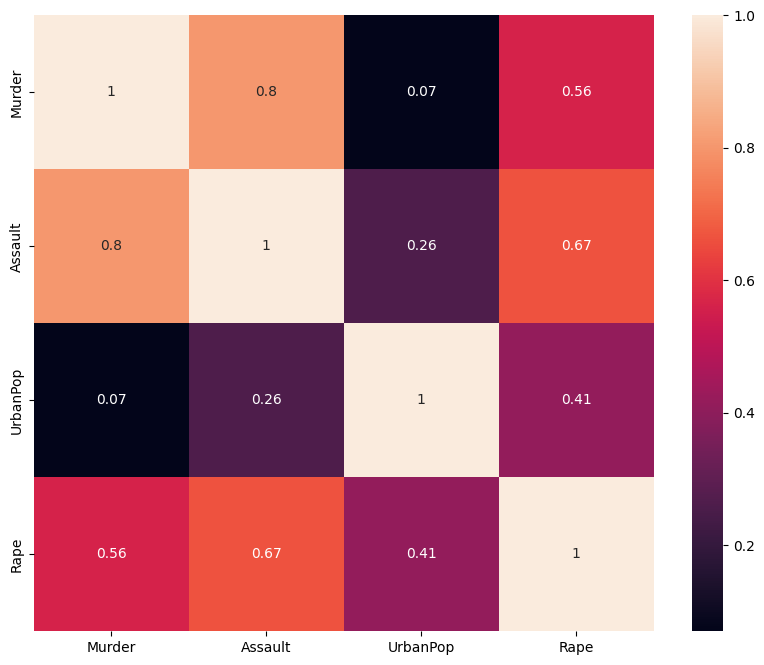

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(crime.corr(),annot=True)
plt.show()

No correlation found in the inputs features.

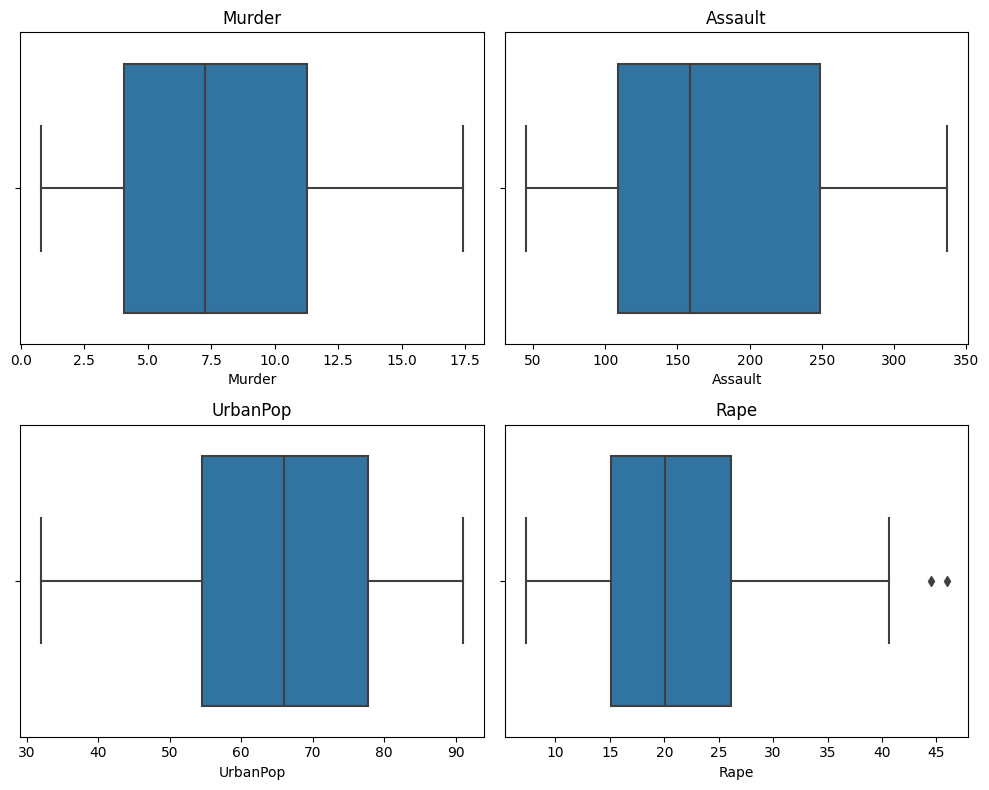

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(x='Murder',data=crime)
plt.title('Murder')
plt.subplot(2,2,2)
sns.boxplot(x='Assault',data=crime)
plt.title('Assault')
plt.subplot(2,2,3)
sns.boxplot(x='UrbanPop',data=crime)
plt.title('UrbanPop')
plt.subplot(2,2,4)
sns.boxplot(x='Rape', data = crime)
plt.title('Rape')
plt.tight_layout()

observed outliers in the 'Rape' features.

Deleting the outliers

In [ ]:
crime.drop(crime.index[crime['Rape']>42],inplace=True)
crime.shape

(48, 4)

**Normalizing Data**

In [ ]:
scaler= MinMaxScaler()
crime_std=scaler.fit_transform(crime)
crime_std=pd.DataFrame(crime_std,columns=crime.columns)
crime_std.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.417417
1,0.439759,0.852740,0.813559,0.711712
2,0.481928,0.496575,0.305085,0.366366
3,0.493976,0.791096,1.000000,1.000000
4,0.427711,0.544521,0.779661,0.942943


**Building Model**

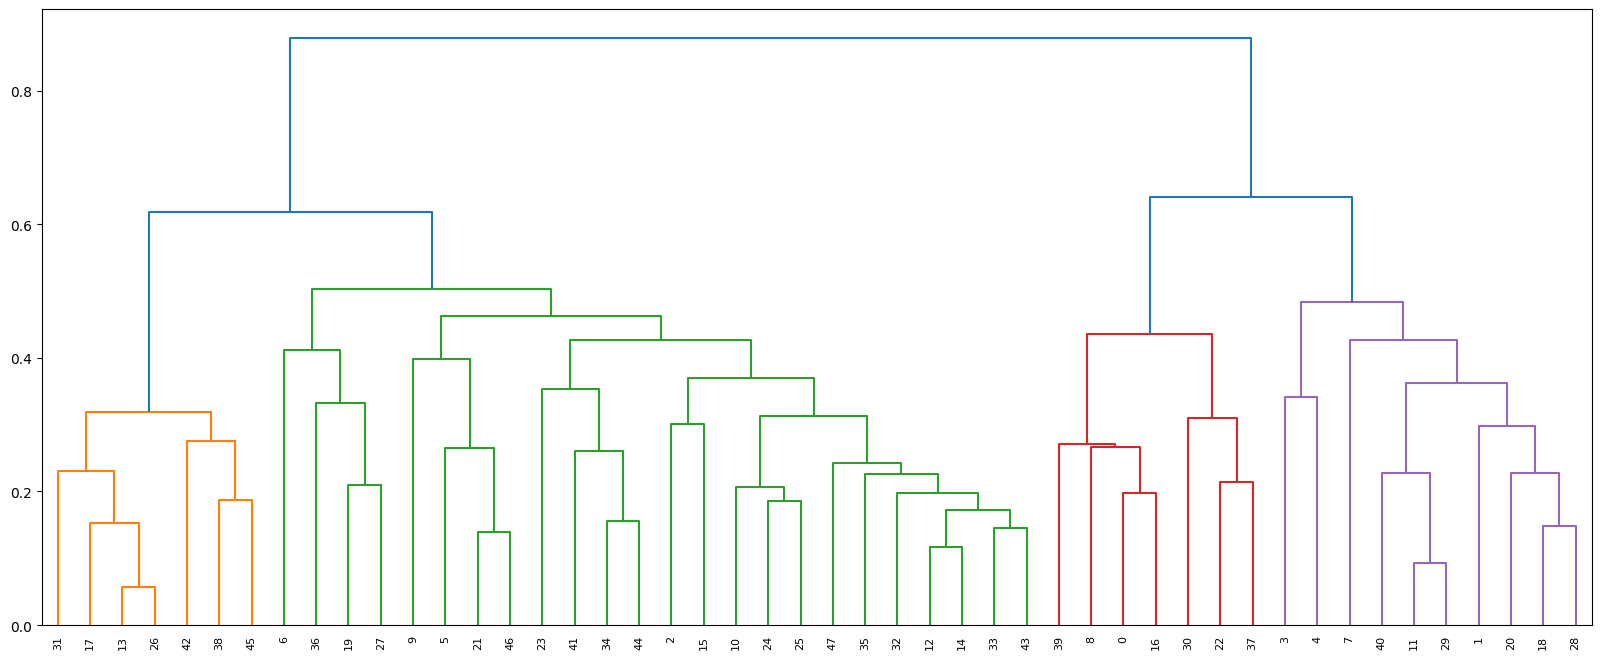

In [ ]:
plt.figure(figsize=(20,8))
dendrograms=sch.dendrogram(sch.linkage(crime_std,method='average'))

from dendogram,we are considering n_clusters = 4

In [ ]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')

**Fitting a Model**

In [ ]:
cf_hc=hc.fit(crime_std)
cf_hc.labels_

array([2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 3, 0, 0, 2, 3, 1, 0, 1, 0,
       2, 0, 0, 0, 3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0, 3, 0,
       0, 3, 0, 0])

**Adding cluster in the data**

In [ ]:
crime['ClusterID_HC']=cf_hc.labels_
crime.head()

,Murder,Assault,UrbanPop,Rape,ClusterID_HC
0,13.2,236,58,21.2,2
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1


**Grouping Clusters**

In [ ]:
crime.groupby('ClusterID_HC').mean()

,Murder,Assault,UrbanPop,Rape
ClusterID_HC,,,,
0,5.675000,131.458333,68.958333,18.220833
1,10.940000,265.300000,78.900000,31.280000
2,14.671429,251.285714,54.285714,21.685714
3,2.700000,65.142857,46.285714,9.885714


In [ ]:
crime['ClusterID_HC'].value_counts()

0    24
1    10
2     7
3     7
Name: ClusterID_HC, dtype: int64

**Calculating 'Silhouette' Score**

In [ ]:
import sklearn
round(sklearn.metrics.silhouette_score(crime_std,cf_hc.labels_),4)

0.3288

**KMeans clustering**

In [ ]:
crime_std.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.417417
1,0.439759,0.852740,0.813559,0.711712
2,0.481928,0.496575,0.305085,0.366366
3,0.493976,0.791096,1.000000,1.000000
4,0.427711,0.544521,0.779661,0.942943


In [ ]:
crime.drop(crime.columns[-1],axis=1,inplace=True)

crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8
10,5.3,46,83,20.2


**'Elbow Curve'**

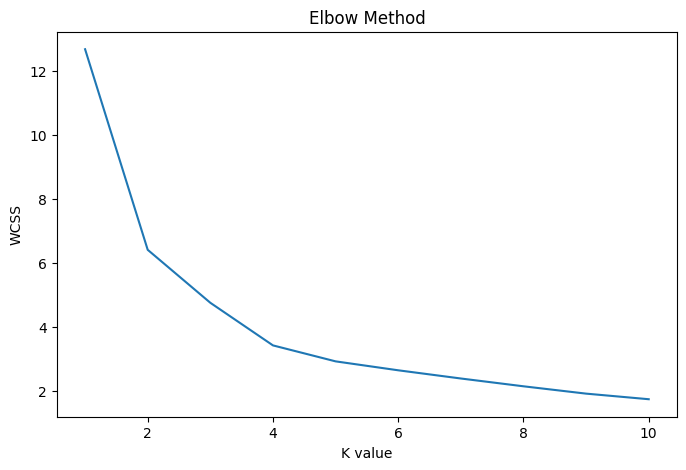

In [ ]:
plt.figure(figsize=(8,5))
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=40)
  kmeans.fit(crime_std)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

From above elbow metgod curve,we will select K values as '4'.

**Fitting Model**

In [ ]:
cr_kmeans=KMeans(n_clusters=4,random_state=40)
cr_kmeans.fit(crime_std)

KMeans(n_clusters=4, random_state=40)

In [ ]:
cr_kmeans.labels_

array([2, 1, 2, 1, 1, 0, 0, 1, 2, 0, 3, 1, 0, 3, 0, 3, 2, 3, 1, 0, 1, 3,
       2, 1, 3, 3, 3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0, 3, 0,
       0, 3, 3, 0], dtype=int32)

**Adding Cluster columns in the data**

In [ ]:
crime['ClusterID_kmeans']=cr_kmeans.labels_
crime.head()

,Murder,Assault,UrbanPop,Rape,ClusterID_kmeans
0,13.2,236,58,21.2,2
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1


**Grouping Clusters**

In [ ]:
crime.groupby('ClusterID_kmeans').mean()

,Murder,Assault,UrbanPop,Rape
ClusterID_kmeans,,,,
0,5.656250,138.875000,73.875000,18.781250
1,10.763636,257.363636,78.090909,31.000000
2,13.937500,243.625000,53.750000,21.412500
3,3.600000,78.538462,52.076923,12.176923


In [ ]:
crime['ClusterID_kmeans'].value_counts()

0    16
3    13
1    11
2     8
Name: ClusterID_kmeans, dtype: int64

**Calculating 'Silhouette' Score**

In [ ]:
import sklearn
round(sklearn.metrics.silhouette_score(crime_std,cr_kmeans.labels_),4)

0.344

**DBSCAN**

In this method, we need epsilon value & minimum points.


Minimum samples > = 4

And we will consider some epsilon value. Let's say 0.5.

In [ ]:
crime_std.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.417417
1,0.439759,0.852740,0.813559,0.711712
2,0.481928,0.496575,0.305085,0.366366
3,0.493976,0.791096,1.000000,1.000000
4,0.427711,0.544521,0.779661,0.942943


In [ ]:
crime.drop(crime.columns[-1],axis=1,inplace=True)
crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7


**Fitting Model**

In [ ]:
cr_dbscan=DBSCAN(eps=0.5,min_samples=4)
cr_dbscan.fit(crime_std)

DBSCAN(min_samples=4)

In [ ]:
cr_dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

Here only one cluster formed with one outlier with epslion value 0.5.

Have to try diffrent epsilon values to get proper clustering with the help of DBSCAN.

In [ ]:
cr_dbscan_1=DBSCAN(eps=0.28,min_samples=4)
cr_dbscan_1.fit(crime_std)

DBSCAN(eps=0.28, min_samples=4)

In [ ]:
cr_dbscan_1.labels_

array([ 0,  2,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  0,
        1,  2,  1,  2,  1, -1,  1,  1,  1,  1,  1,  2, -1, -1,  1,  1,  1,
        1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

**Adding cluster columns in data**

In [ ]:
crime['Cluster ID']=cr_dbscan_1.labels_
crime.head()

,Murder,Assault,UrbanPop,Rape,Cluster ID
0,13.2,236,58,21.2,0
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1


**Grouping cluster**

In [ ]:
crime.groupby('Cluster ID').mean()

,Murder,Assault,UrbanPop,Rape
Cluster ID,,,,
-1,11.290909,237.272727,72.909091,25.618182
0,14.050000,238.000000,57.750000,23.200000
1,4.962069,114.724138,62.896552,16.224138
2,10.725000,283.500000,72.750000,31.500000


**Calculating 'Silhouette' Score**

In [ ]:
import sklearn
round(sklearn.metrics.silhouette_score(crime_std,cr_dbscan_1.labels_),4)

0.1969

**Conclusion**

Silhouette Score:

* Hierarchical Clustering : 0.329

* KMeans : 0.344

* DBSCAN : 0.197

From this , we can conclude that KMeans technique is giving highest 'Silhouette score', so we
will consider KMeans for further predictions.